<a href="https://colab.research.google.com/github/aldookware/auto-send-tweets/blob/master/optimizer_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Dict

### Objective function and analytic gradient

We will use a **two-dimensional non-convex test function**, formed by combining a quadratic bowl with two Gaussian wells. The function is defined as:

$$
f(x,y)= -2\,\exp\!\left(-\tfrac{(x-1)^2+y^2}{0.2}\right)
        -3\,\exp\!\left(-\tfrac{(x+1)^2+y^2}{0.2}\right)
        + x^2+y^2 .
$$

This creates two Gaussian “wells” centered at $(1,0)$ and $(-1,0)$ (the left one being deeper), plus a quadratic bowl centered at the origin.

Let

$$
e_1=\exp\!\left(-\tfrac{(x-1)^2+y^2}{0.2}\right), \qquad
e_2=\exp\!\left(-\tfrac{(x+1)^2+y^2}{0.2}\right).
$$

The gradient is:

$$
\nabla f(x,y)=
\begin{bmatrix}
2x + 20(x-1)\,e_1 + 30(x+1)\,e_2 \\[4pt]
2y + 20y\,e_1 + 30y\,e_2
\end{bmatrix}.
$$

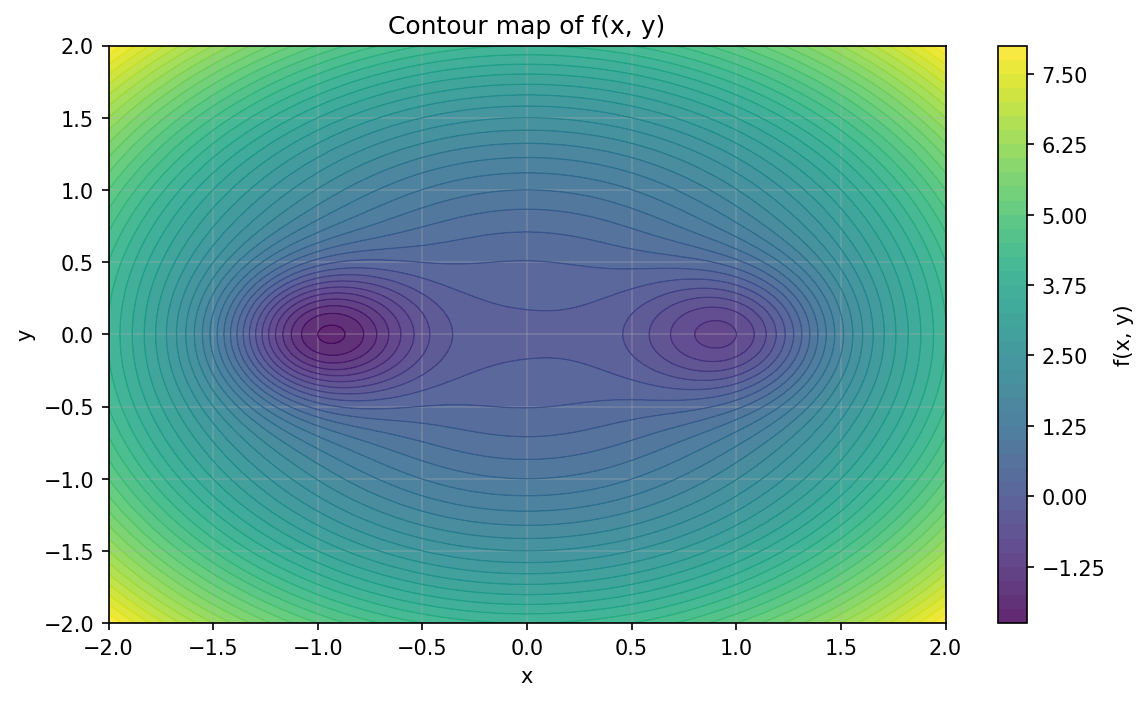

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------
# Define objective function f(x,y)
# -------------------------------------
def f(x: float, y: float) -> float:
    """
    Objective: quadratic bowl + two Gaussian wells.
    """
    # TODO: fill in the exponential terms e1 and e2
    e1 = # well centered at (1,0)
    e2 = # well centered at (-1,0)

    return -2.0 * e1 - 3.0 * e2 + x * x + y * y


# -------------------------------------
# Gradient ∇f(x,y)
# -------------------------------------
def grad(x: float, y: float) -> np.ndarray:
    """
    Analytic gradient of f(x,y).
    """
    # TODO: fill in the exponential terms e1 and e2
    e1 =
    e2 =

    # TODO: fill in gx = ∂f/∂x, gy = ∂f/∂y
    gx =
    gy =

    return np.array([gx, gy], dtype=float)


# -------------------------------------
# Plot contour of f(x,y)
# -------------------------------------
xlim = (-2.0, 2.0)
ylim = (-2.0, 2.0)
res  = 400

xs = np.linspace(*xlim, res)
ys = np.linspace(*ylim, res)
XX, YY = np.meshgrid(xs, ys)

ZZ = np.vectorize(f)(XX, YY)

fig, ax = plt.subplots(figsize=(9, 5), dpi=150)

cf = ax.contourf(XX, YY, ZZ, levels=40, alpha=0.85)
ax.contour(XX, YY, ZZ, levels=40, linewidths=0.6)

fig.colorbar(cf, ax=ax, label='f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Contour map of f(x, y)')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.grid(True, alpha=0.3)

plt.show()


### Optimizers

We will implement and compare several optimization algorithms. Each algorithm updates the parameters
$(x_t, y_t)$ using the gradient $\nabla f(x_t, y_t)$.

---

#### 1. Gradient Descent (GD)

The simplest method performs a step in the **negative gradient direction**:

$$
(x_{t+1}, y_{t+1}) = (x_t, y_t) - \eta \,\nabla f(x_t, y_t),
$$

where $\eta > 0$ is the learning rate.

---

#### 2. Momentum

Momentum introduces a velocity vector $v_t$ that accumulates past gradients:

$$
\begin{aligned}
v_{t+1} &= \mu v_t - \eta \nabla f(x_t, y_t), \\
(x_{t+1}, y_{t+1}) &= (x_t, y_t) + v_{t+1},
\end{aligned}
$$

where $0 \le \mu < 1$ is the momentum parameter.

---

#### 3. Signed Gradient Descent (SignGD)

Instead of using the gradient magnitude, we only use the **sign** of each component:

$$
(x_{t+1}, y_{t+1}) = (x_t, y_t) - \eta \,\mathrm{sign}\!\left(\nabla f(x_t, y_t)\right).
$$

This results in uniform-sized steps in each coordinate direction.

---

#### 4. Soft-Signed Gradient Descent

To smooth the discontinuity of the sign function, we apply a **softsign** transform with parameter $\tau > 0$:

$$
\mathrm{softsign}(z) = \frac{z/\tau}{1 + |z|/\tau}.
$$

The update becomes

$$
(x_{t+1}, y_{t+1}) = (x_t, y_t) - \eta \,\mathrm{softsign}\!\Big(\nabla f(x_t, y_t)\Big).
$$

---

#### 5. RMSProp

RMSProp normalizes the gradient by a running average of its squared values:

$$
\begin{aligned}
v_{t+1} &= \beta v_t + (1-\beta)\,\big(\nabla f(x_t, y_t)\big)^{\odot 2}, \\
(x_{t+1}, y_{t+1}) &= (x_t, y_t) - \eta \,\frac{\nabla f(x_t, y_t)}{\sqrt{v_{t+1}} + \varepsilon},
\end{aligned}
$$

where $\odot$ denotes elementwise square.

---

#### 6. Adam

Adam combines **momentum** and **adaptive scaling** (like RMSProp). It maintains first- and second-moment estimates:

$$
\begin{aligned}
m_{t+1} &= \beta_1 m_t + (1-\beta_1)\,\nabla f(x_t, y_t), \\
v_{t+1} &= \beta_2 v_t + (1-\beta_2)\,\big(\nabla f(x_t, y_t)\big)^{\odot 2}, \\
\hat m_{t+1} &= \frac{m_{t+1}}{1-\beta_1^{t+1}}, \quad
\hat v_{t+1} = \frac{v_{t+1}}{1-\beta_2^{t+1}}, \\
(x_{t+1}, y_{t+1}) &= (x_t, y_t) - \eta \,\frac{\hat m_{t+1}}{\sqrt{\hat v_{t+1}}+\varepsilon}.
\end{aligned}
$$



In [ ]:
# -----------------------------
# Optimizers (fill in the TODO parts)
# -----------------------------

def run_gd(x0: float, y0: float, steps: int, lr: float):
    x, y = x0, y0
    traj = [(x, y)]
    losses = [f(x, y)]
    for _ in range(steps):
        g = grad(x, y)
        # TODO: update x, y using gradient descent
        # x = ...
        # y = ...
        traj.append((x, y))
        losses.append(f(x, y))
    return np.array(traj), np.array(losses)


def run_momentum(x0: float, y0: float, steps: int, lr: float, mu: float = 0.9):
    x, y = x0, y0
    v = np.zeros(2)   # velocity
    traj = [(x, y)]
    losses = [f(x, y)]
    for _ in range(steps):
        g = grad(x, y)
        # TODO: update velocity v and parameters x, y
        # v = ...
        # x = ...
        # y = ...
        traj.append((x, y))
        losses.append(f(x, y))
    return np.array(traj), np.array(losses)


def run_sign_gd(x0: float, y0: float, steps: int, lr: float):
    """Elementwise sign(grad) step (a.k.a. signSGD)."""
    x, y = x0, y0
    traj = [(x, y)]
    losses = [f(x, y)]
    for _ in range(steps):
        g = grad(x, y)
        # TODO: update x, y using only the sign of g
        # step = ...
        # x = ...
        # y = ...
        traj.append((x, y))
        losses.append(f(x, y))
    return np.array(traj), np.array(losses)


def run_softsign_gd(x0: float, y0: float, steps: int, lr: float, tau: float = 5.0):
    """
    Soft-signed step: elementwise softsign(g/tau) = (g/tau) / (1 + |g|/tau).
    Saturates like sign but remains smooth around 0.
    """
    x, y = x0, y0
    traj = [(x, y)]
    losses = [f(x, y)]
    for _ in range(steps):
        g = grad(x, y)
        # TODO: compute softsign of g, then update x, y
        # z = ...
        # soft = ...
        # step = ...
        # x = ...
        # y = ...
        traj.append((x, y))
        losses.append(f(x, y))
    return np.array(traj), np.array(losses)


def run_rmsprop(x0: float, y0: float, steps: int, lr: float, beta: float = 0.99, eps: float = 1e-8):
    x, y = x0, y0
    v = np.zeros(2)  # running average of squared gradients
    traj = [(x, y)]
    losses = [f(x, y)]
    for _ in range(steps):
        g = grad(x, y)
        # TODO: update running average v and parameters x, y
        # v = ...
        # step = ...
        # x = ...
        # y = ...
        traj.append((x, y))
        losses.append(f(x, y))
    return np.array(traj), np.array(losses)


def run_adam(x0: float, y0: float, steps: int, lr: float, b1: float = 0.9, b2: float = 0.999, eps: float = 1e-8):
    x, y = x0, y0
    m = np.zeros(2)  # first moment (mean of gradients)
    v = np.zeros(2)  # second moment (mean of squared gradients)
    traj = [(x, y)]
    losses = [f(x, y)]
    for t in range(1, steps + 1):
        g = grad(x, y)
        # TODO: update m, v, compute bias-corrected mhat, vhat, then update x, y
        # m = ...
        # v = ...
        # mhat = ...
        # vhat = ...
        # step = ...
        # x = ...
        # y = ...
        traj.append((x, y))
        losses.append(f(x, y))
    return np.array(traj), np.array(losses)


In [ ]:
# -----------------------------
# Optimizers
# -----------------------------

def run_all(x0: float, y0: float, steps: int, HYPERS):
    results = {}
    results["GD"]        = run_gd(x0, y0, steps, **HYPERS["GD"])
    results["Momentum"]  = run_momentum(x0, y0, steps, **HYPERS["Momentum"])
    results["SignedGD"]  = run_sign_gd(x0, y0, steps, **HYPERS["SignedGD"])
    results["SoftSignGD"]= run_softsign_gd(x0, y0, steps, **HYPERS["SoftSignGD"])
    results["RMSProp"]   = run_rmsprop(x0, y0, steps, **HYPERS["RMSProp"])
    results["Adam"]      = run_adam(x0, y0, steps, **HYPERS["Adam"])
    return results

def draw(results: Dict[str, tuple], xlim=(-2, 2), ylim=(-2, 2)):
    xs = np.linspace(xlim[0], xlim[1], 300)
    ys = np.linspace(ylim[0], ylim[1], 300)
    XX, YY = np.meshgrid(xs, ys)
    ZZ = np.vectorize(f)(XX, YY)

    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
    cf = ax.contourf(XX, YY, ZZ, levels=30, alpha=0.8)
    ax.set_facecolor("white")
    ax.contour(XX, YY, ZZ, levels=30, linewidths=0.5)

    styles = {
        "GD": "-.",
        "Momentum": (0, (1, 1)),
        "SignedGD": "-",
        "SoftSignGD": (0, (1, 1)),
        "RMSProp": (0, (3, 1, 1, 1)),
        "Adam": (0, (5, 1, 1, 1)),
    }

    # Plot each path
    for name, (traj, losses) in results.items():
        ax.plot(traj[:, 0], traj[:, 1], linestyle=styles.get(name, "-"), linewidth=2, label=name)
        ax.plot(traj[0, 0], traj[0, 1], marker="o", markersize=4)
        ax.plot(traj[-1, 0], traj[-1, 1], marker="x", markersize=6)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Optimization trajectories on a 2D landscape")
    ax.legend(loc="upper left", frameon=True)

    out_path = "./optimizer_trajectories.png"
    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.show()
    return out_path

def print_final_points_and_losses(results: Dict[str, tuple], start=None, steps: int | None = None):
    if steps is None:
        any_name = next(iter(results))
        steps = len(results[any_name][1]) - 1

    header = f"Final results after {steps} steps"
    if start is not None:
        header += f", start = ({start[0]:.4f}, {start[1]:.4f})"
    print(header)

    for name, (traj, losses) in results.items():
        xT, yT = traj[-1, 0], traj[-1, 1]
        fT = losses[-1]
        print(f"{name:>10s}: f(x_T) = {fT: .6f},  at (x_T, y_T) = ({xT: .4f}, {yT: .4f})")

    best_name, best_val = min(
        ((n, ls[-1]) for n, (_, ls) in results.items()),
        key=lambda kv: kv[1]
    )
    print(f"\nBest (lowest loss): {best_name} with f(x_T) = {best_val:.6f}")

Final results after 500 steps, start = (-1.2000, 1.2000)
        GD: f(x_T) = -2.063090,  at (x_T, y_T) = (-0.9363,  0.0000)
  Momentum: f(x_T) = -1.092732,  at (x_T, y_T) = ( 0.9053, -0.0000)
  SignedGD: f(x_T) = -2.054496,  at (x_T, y_T) = (-0.9600, -0.0000)
SoftSignGD: f(x_T) = -2.063090,  at (x_T, y_T) = (-0.9363,  0.0000)
   RMSProp: f(x_T) = -2.056295,  at (x_T, y_T) = (-0.9510, -0.0149)
      Adam: f(x_T) = -2.063072,  at (x_T, y_T) = (-0.9373,  0.0003)

Best (lowest loss): GD with f(x_T) = -2.063090


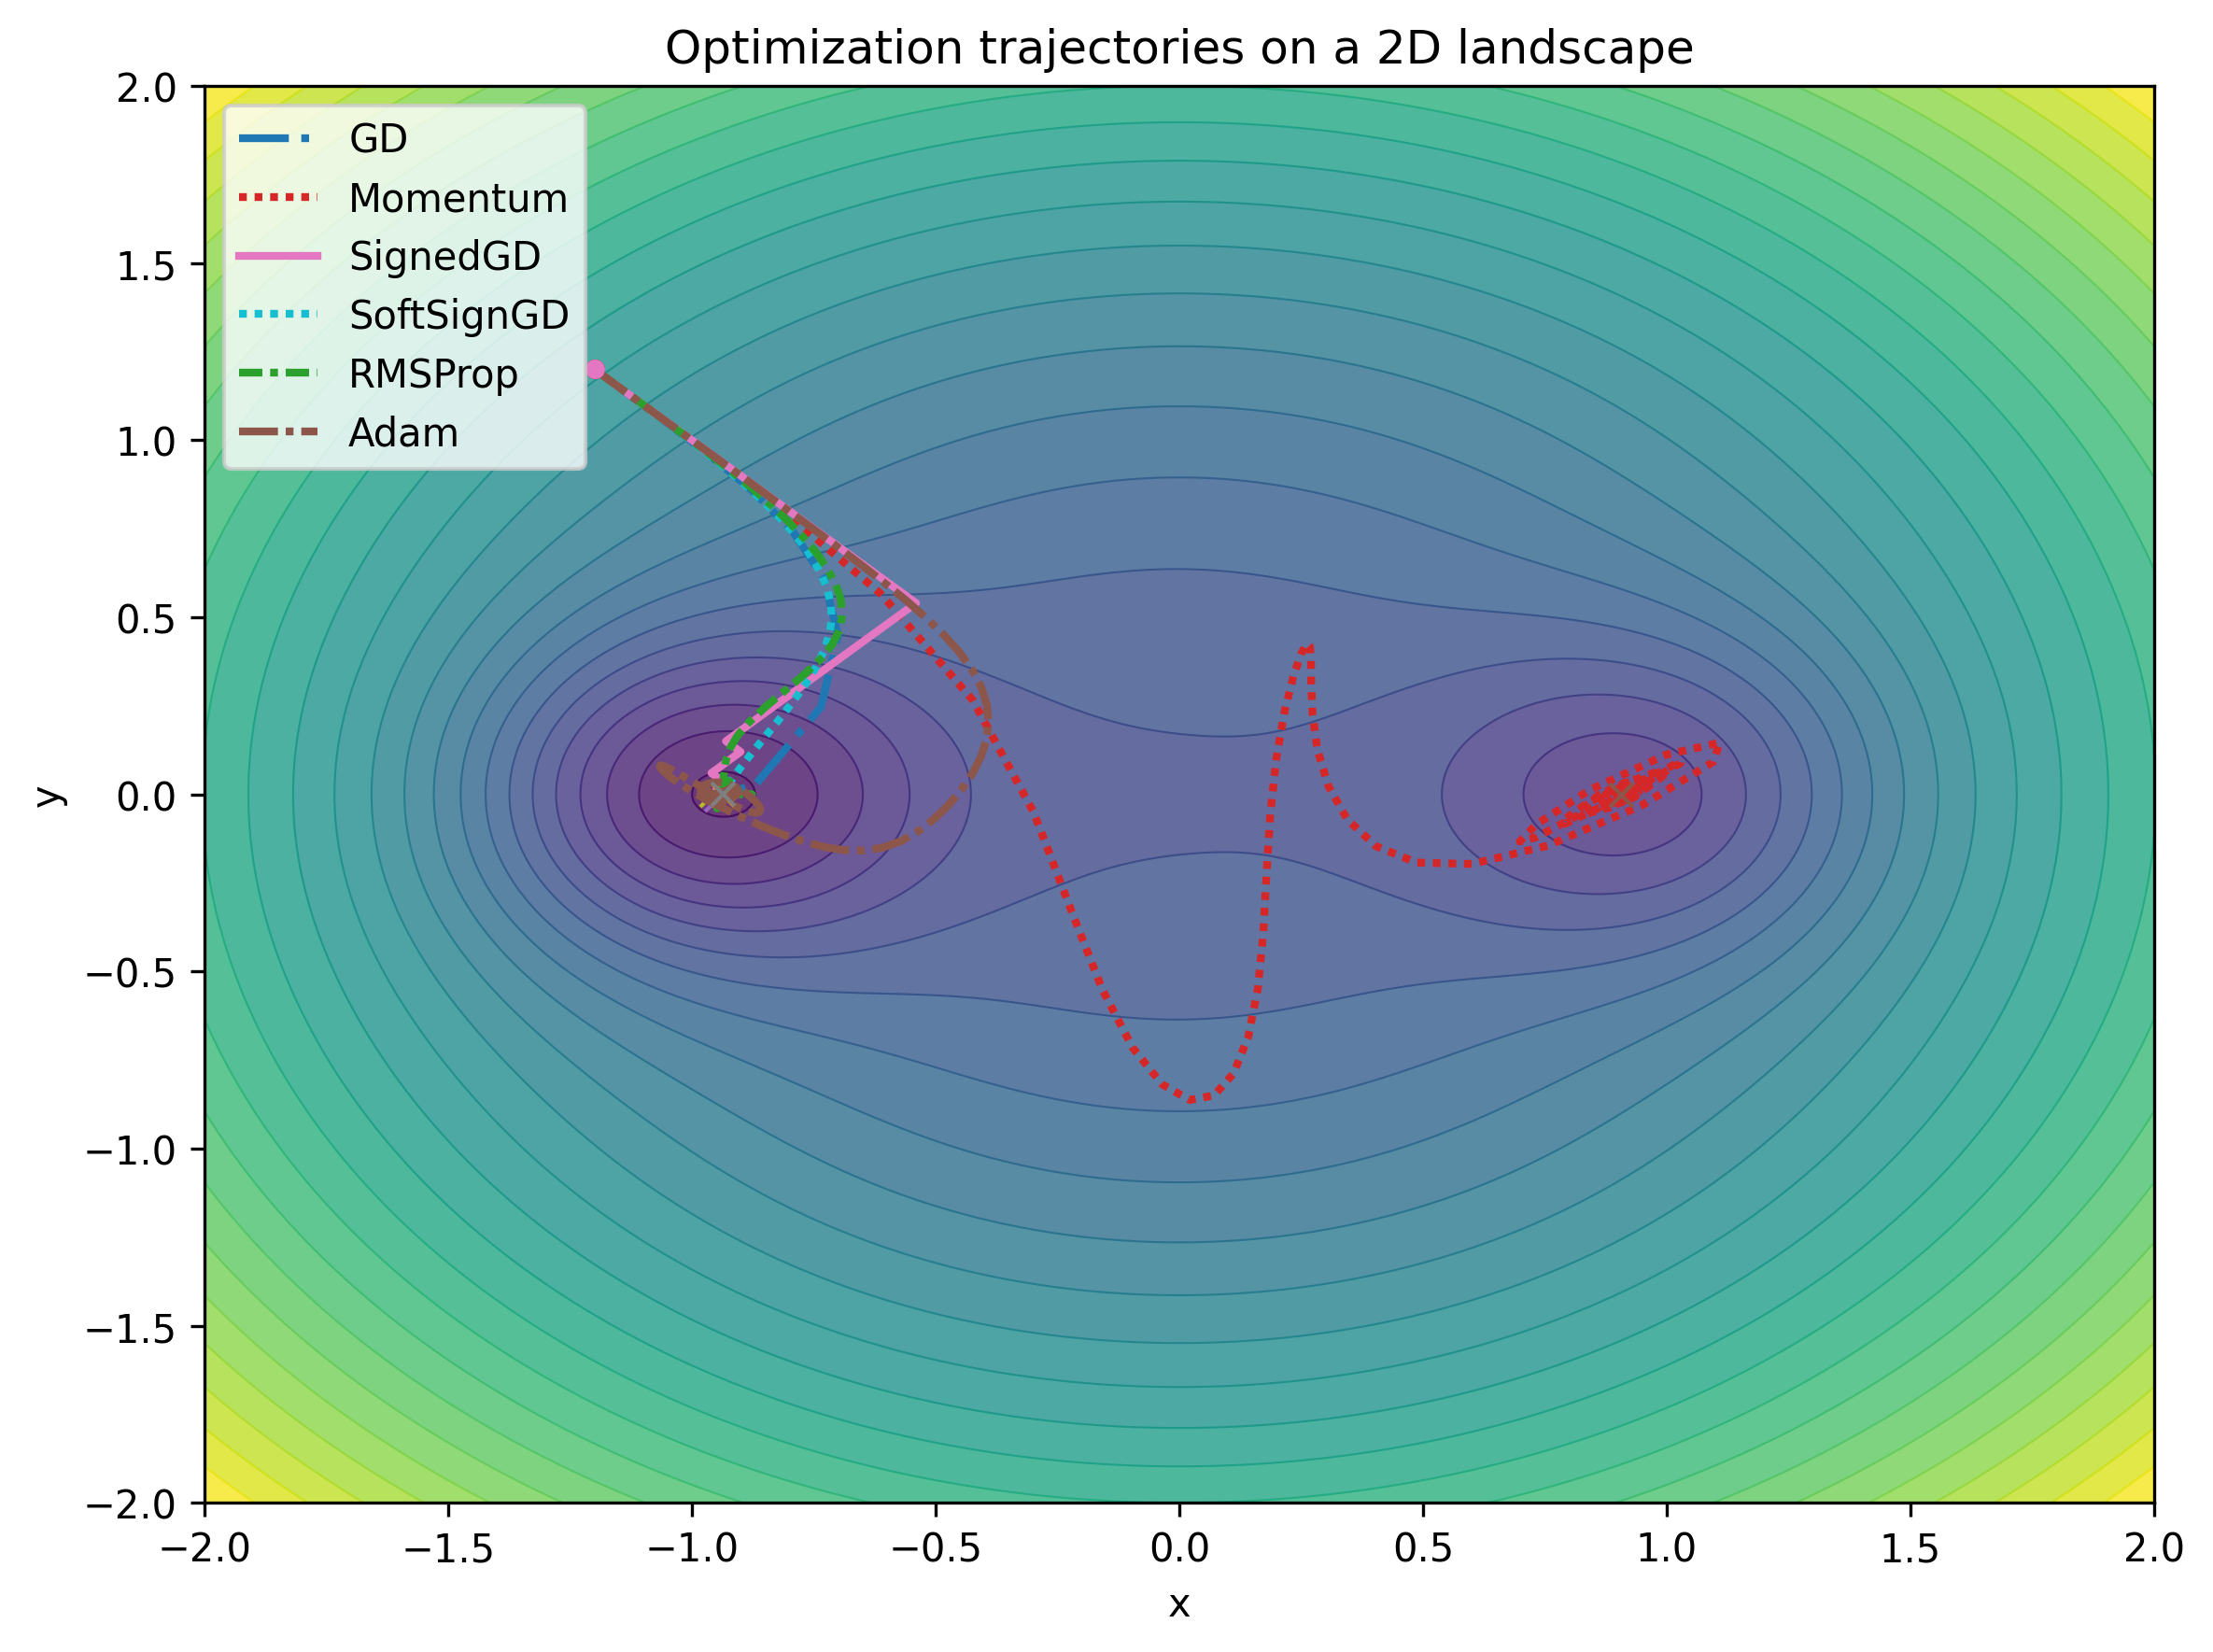

In [ ]:
START: Tuple[float, float] = (-1.2, 1.2)
# START: Tuple[float, float] = (1.2, 1.2)
# START: Tuple[float, float] = (0.3, 1.5)

# STEPS = 50
# STEPS = 200
STEPS = 500

HYPERS: Dict[str, dict] = {
    "GD":        dict(lr=0.05),
    "Momentum":  dict(lr=0.03, mu=0.9),
    "SignedGD":  dict(lr=0.03),
    "SoftSignGD":dict(lr=0.10, tau=5.0),
    "RMSProp":   dict(lr=0.03, beta=0.9, eps=1e-8),
    "Adam":      dict(lr=0.05, b1=0.9, b2=0.9, eps=1e-8),
}

results_ = run_all(*START, STEPS, HYPERS)
print_final_points_and_losses(results_, start=START, steps=STEPS)
png_path = draw(results_)